In [1]:
# Upload first
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# View the data
df.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
# Check data shape and types
df.info()

# Check missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [4]:
# Drop missing values
df = df.dropna()

# Confirm again
df.isnull().sum()


,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [5]:
# Use Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Company Type'] = le.fit_transform(df['Company Type'])
df['WFH Setup Available'] = le.fit_transform(df['WFH Setup Available'])
df['Gender'] = le.fit_transform(df['Gender'])


In [6]:
X = df[['Mental Fatigue Score', 'Resource Allocation', 'Designation',
        'WFH Setup Available', 'Company Type', 'Gender']]

y = df['Burn Rate']


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", lr_r2)
print("RMSE:", lr_rmse)

R² Score: 0.9202219777928837
RMSE: 0.05535212644687294


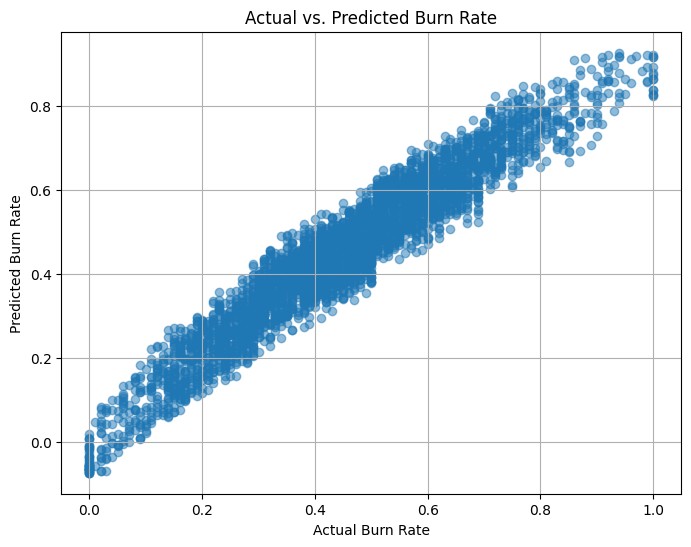

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.title("Actual vs. Predicted Burn Rate")
plt.grid(True)
plt.show()

In [10]:
import pickle

# Save the trained model
filename = 'linear_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved as {filename}")

Model saved as linear_regression_model.pkl


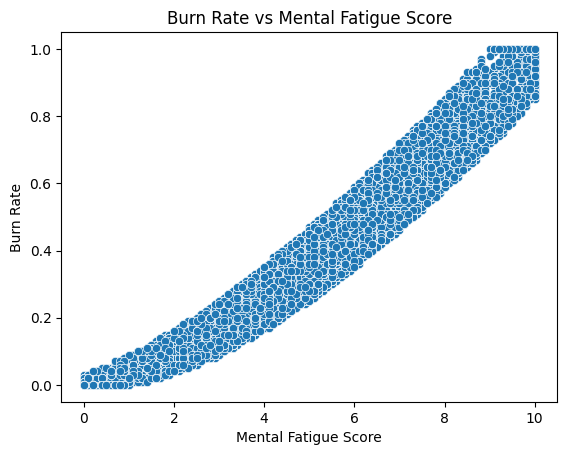

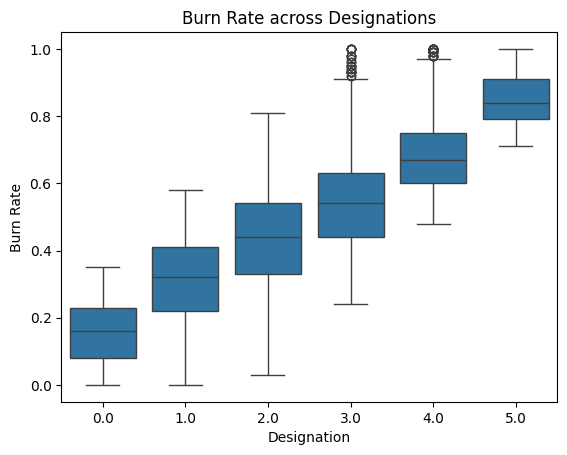

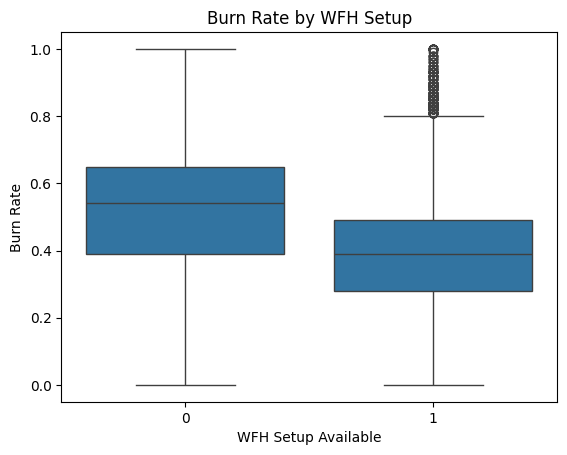

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Burn Rate vs Mental Fatigue Score
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=df)
plt.title("Burn Rate vs Mental Fatigue Score")
plt.show()

# Burn Rate by Designation
sns.boxplot(x='Designation', y='Burn Rate', data=df)
plt.title("Burn Rate across Designations")
plt.show()

# Burn Rate by WFH Setup
sns.boxplot(x='WFH Setup Available', y='Burn Rate', data=df)
plt.title("Burn Rate by WFH Setup")
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [14]:
# Create and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(f"📊 Random Forest R²: {rf_r2:.4f}")
print(f"📉 Random Forest RMSE: {rf_rmse:.4f}")


📊 Random Forest R²: 0.9122
📉 Random Forest RMSE: 0.0581


In [15]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

xgb_r2 = r2_score(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print(f"📊 XGBoost R²: {xgb_r2:.4f}")
print(f"📉 XGBoost RMSE: {xgb_rmse:.4f}")


📊 XGBoost R²: 0.9279
📉 XGBoost RMSE: 0.0526


In [18]:
print("🔎 Model Comparison:")
print(f"Linear Regression  - R²: {lr_r2:.4f}, RMSE: {lr_rmse:.4f}")
print(f"Random Forest      - R²: {rf_r2:.4f}, RMSE: {rf_rmse:.4f}")
print(f"XGBoost Regressor  - R²: {xgb_r2:.4f}, RMSE: {xgb_rmse:.4f}")

🔎 Model Comparison:
Linear Regression  - R²: 0.9202, RMSE: 0.0554
Random Forest      - R²: 0.9122, RMSE: 0.0581
XGBoost Regressor  - R²: 0.9279, RMSE: 0.0526
